In [1]:
import sys
#sys.path.append("<InstallPath>\TechnicalDrawingPython")
#To avoid character encoding issues:
#for example, you can use "\U" instead of "U"
#or simply replace all "\" by "\\"
#for example,
#sys.path.append("C:\\Users\\User\\TechnicalDrawingPython")

In [2]:
import numpy as np
import math
from mpl_toolkits import mplot3d
from technicaldrawpy import Transformations,Sahne,Camera,Vertex,Edge,Surface,LinearObject,Cube,Sahnecams

$4$x$2$x$2$ boyutlarındaki bir küp nesnesi, önce $y$ ekseninde sağ el kuralına göre $7.5$ derece döndürülmüş ardından $x$ ekseninde 4, $y$ ekseninde 4 ve $z$ ekseninde $9$ birim kaydırılmış olsun. Orijinde bulunan kameranın $z$ eksenindeki odak noktası $-8$'de, diğer eksenlerdeki odak noktaları sonsuzda yer almaktadır. Elde edilen kamera görüntüsü aşağıda gösterilmiştir.

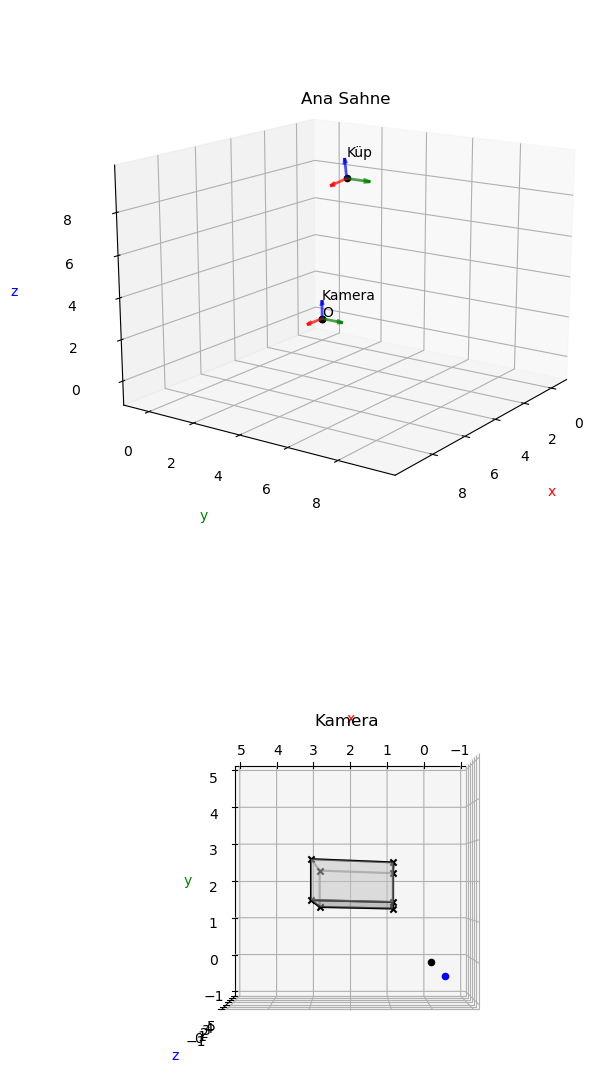

In [3]:
sahneU2_01=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",1) # 1 adet kamera tanımlanacak
sahneU2_01.copdistancelimit=10 # projeksiyon merkez noktası orijin noktasına 10 birimden daha uzaksa gösterilmeyecek 
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1=Camera.Camera(90,8,-90,sahneU2_01,"Kamera",[0,4]) # [0,4] görüş limitleri
mycam1.set_copfocalsxyz([-1000000,-1000000,-8]) # -1000000 (at infinity)
mycam1.set_generateviewbools(False,False,True,False,False,False)
sahneU2_01.addcamera(mycam1)
mycube=Cube.Cube(4,2,2,sahneU2_01,"Küp") # 4 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_y(math.pi/24)
mycube.translate_xyz(4,4,9)
sahneU2_01.addobj(mycube)
sahneU2_01.calculate_positions()
sahneU2_01.show()

Aşağıda sadece kameranın $x$ ekseninin yönü tersine değiştirildiğinde ortaya çıkan duruma yer verilmiştir.

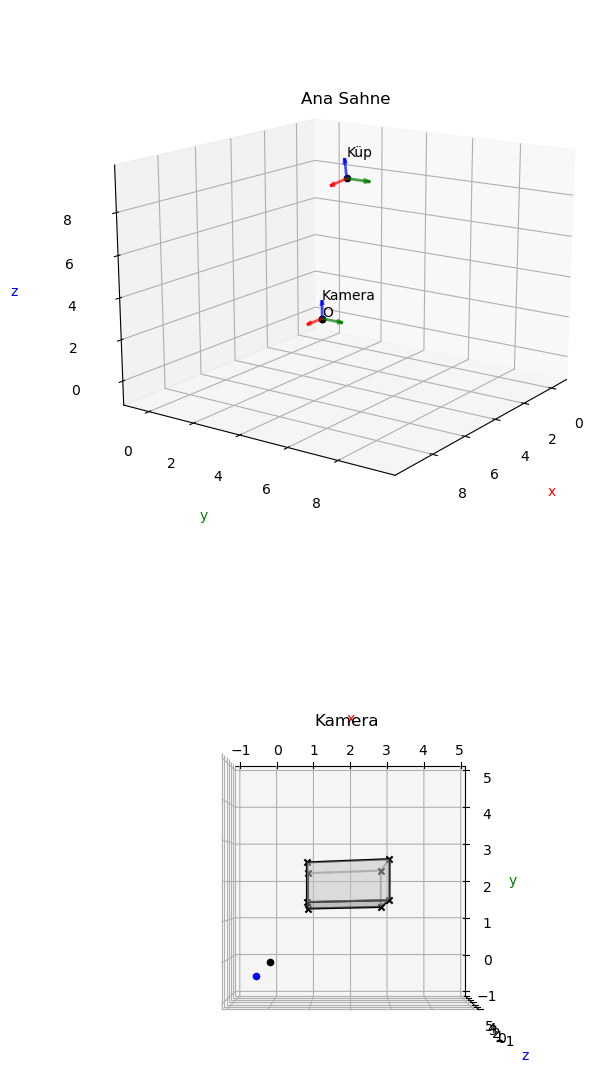

In [4]:
sahneU2_02=Sahnecams.Sahnecams(35,6,15,"Ana Sahne\n",1) # 1 adet kamera tanımlanacak
sahneU2_02.copdistancelimit=10 # projeksiyon merkez noktası orijin noktasına 10 birimden daha uzaksa gösterilmeyecek 
# set_generateviewbools(cameratfgen,persorobliquetfgen,prjztfgen,traceptgen,vrfraypersgen,vrfrayobliquegen)
mycam1=Camera.Camera(90,8,-90,sahneU2_02,"Kamera",[0,4]) # [0,4] görüş limitleri
mycam1.set_copfocalsxyz([-1000000,-1000000,-8]) # -1000000 (at infinity)
mycam1.set_generateviewbools(False,False,True,False,False,False)
sahneU2_02.addcamera(mycam1)
mycube=Cube.Cube(4,2,2,sahneU2_02,"Küp") # 4 x 2 x 2 ebatlarında bir küp nesnesi
mycube.rotate_y(math.pi/24)
mycube.translate_xyz(4,4,9)
sahneU2_02.addobj(mycube)
sahneU2_02.calculate_positions()
sahneU2_02.show()
mycam1.ax.invert_xaxis() # eğer bu kod parçası eklenirse kamera (projeksiyon düzlemi) görüntüsü elde edilirken 
# dönüşler sağ el yerine sol el kuralına göre yapılmış gibi gözükür

Kamera görüntüsünü elde ederken tek başına $x$ ekseninin yönünü tersine çevirmenin ana sahnede gösterilen pozlama işlemleriyle tamamen uyumlu olduğunu söylemek gerekir. Ancak sadece kamera görüntüsünde $x$ ekseninin yönünü tersine çevirmenin sonucunda, ana sahnede sağ el kuralına göre gerçekleşen dönüşler kameradan bakıldığında sol el kuralına göre gerçekleşmiş gibi gözükür. Bunun sebebi kamera görüntüsündeki eksenlerin sol el kuralına göre yeniden düzenlenmiş olmasıdır.